# Data analysis:

First, few imports:

In [1]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from src.utils.plot_utils import hist, count, scatter
from dotenv import load_dotenv

We will now load the dataframe and show some statistics for each feature::

In [2]:
# basic data analysis - see https://www.kaggle.com/code/antoniosabatini/tiktok-popularity-track-eda-ml-models/notebook
# for info on audio features see https://developer.spotify.com/documentation/web-api/reference/get-audio-features

CSV_PATH = '../data/chartex_final.csv'

df = pd.read_csv(CSV_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         3932 non-null   object 
 1   track_pop          3932 non-null   int64  
 2   artist             3932 non-null   object 
 3   artist_pop         3932 non-null   int64  
 4   album              3932 non-null   object 
 5   danceability       3932 non-null   float64
 6   energy             3932 non-null   float64
 7   key                3932 non-null   float64
 8   loudness           3932 non-null   float64
 9   mode               3932 non-null   float64
 10  speechiness        3932 non-null   float64
 11  acousticness       3932 non-null   float64
 12  instrumentalness   3932 non-null   float64
 13  liveness           3932 non-null   float64
 14  valence            3932 non-null   float64
 15  tempo              3932 non-null   float64
 16  id                 3932 

In [12]:
#dicard string type features
df = df.drop(['track_name', 'artist', 'album', 'id', 'song_name', 'artist_name'], axis = 1, errors='ignore')

# basic statistics
df.describe()

,track_pop,artist_pop,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,time_signature,total_likes_count,number_of_videos,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc
count,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3932.00000,3932.000000,3932.000000,3932.000000,3932.000000,...,3932.000000,3.932000e+03,3.932000e+03,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000
mean,39.534079,53.755849,0.684398,0.629991,5.259156,-7.13396,0.565107,0.109868,0.304975,0.082582,...,3.942014,9.594847e+07,7.948575e+05,0.344815,0.161106,1936.331199,2051.819951,3934.805888,0.087019,-4.193676
std,27.037639,22.152220,0.159415,0.200178,3.648960,3.89145,0.495806,0.113087,0.286771,0.232230,...,0.348993,1.572056e+08,1.667153e+06,0.080102,0.075508,575.741244,436.094390,1229.033046,0.035385,5.970991
min,0.000000,0.000000,0.000000,0.000000,0.000000,-47.88100,0.000000,0.000000,0.000000,0.000000,...,0.000000,8.401000e+03,1.474000e+05,0.096115,0.000841,333.710695,339.844094,464.222193,0.007402,-44.981251
25%,12.000000,39.000000,0.587000,0.503750,2.000000,-8.39400,0.000000,0.039700,0.055900,0.000000,...,4.000000,1.484354e+07,2.118000e+05,0.288060,0.105083,1549.669421,1796.814376,3115.497828,0.063423,-8.206202
50%,44.000000,56.000000,0.710000,0.656000,5.000000,-6.31150,1.000000,0.062600,0.215500,0.000003,...,4.000000,4.359626e+07,3.452500e+05,0.335856,0.154893,1938.743192,2096.506577,3966.742680,0.082801,-3.706780
75%,62.000000,71.000000,0.802000,0.782000,9.000000,-4.74875,1.000000,0.133000,0.506250,0.001207,...,4.000000,1.162964e+08,7.523760e+05,0.394416,0.208411,2315.685836,2361.586435,4800.564722,0.105118,0.203626
max,95.000000,100.000000,0.985000,1.000000,11.000000,1.64600,1.000000,0.962000,0.995000,0.989000,...,5.000000,4.187998e+09,4.104930e+07,0.748293,0.654402,8465.743247,3264.329462,9940.981555,0.786069,10.504771


In [4]:
# Count the number of unique values in each column
print((df.nunique()/len(df)).sort_values())

mode                 0.000509
time_signature       0.001272
key                  0.003052
artist_pop           0.023906
track_pop            0.024415
danceability         0.179552
energy               0.216938
valence              0.247457
liveness             0.255341
speechiness          0.270855
instrumentalness     0.421414
acousticness         0.441251
number_of_videos     0.754578
loudness             0.823754
tempo                0.901322
duration_ms          0.949644
zcr                  0.977365
rolloff              0.980926
chroma_stft          0.985758
rmse                 0.986012
spec_cent            0.986012
spec_bw              0.986012
mfcc                 0.986012
total_likes_count    1.000000
dtype: float64


## Distribution of the numerical and categorical columns

On the original features:

c:\GitHub\go-viral\go-viral\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\GitHub\go-viral\go-viral\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\GitHub\go-viral\go-viral\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\GitHub\go-viral\go-viral\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

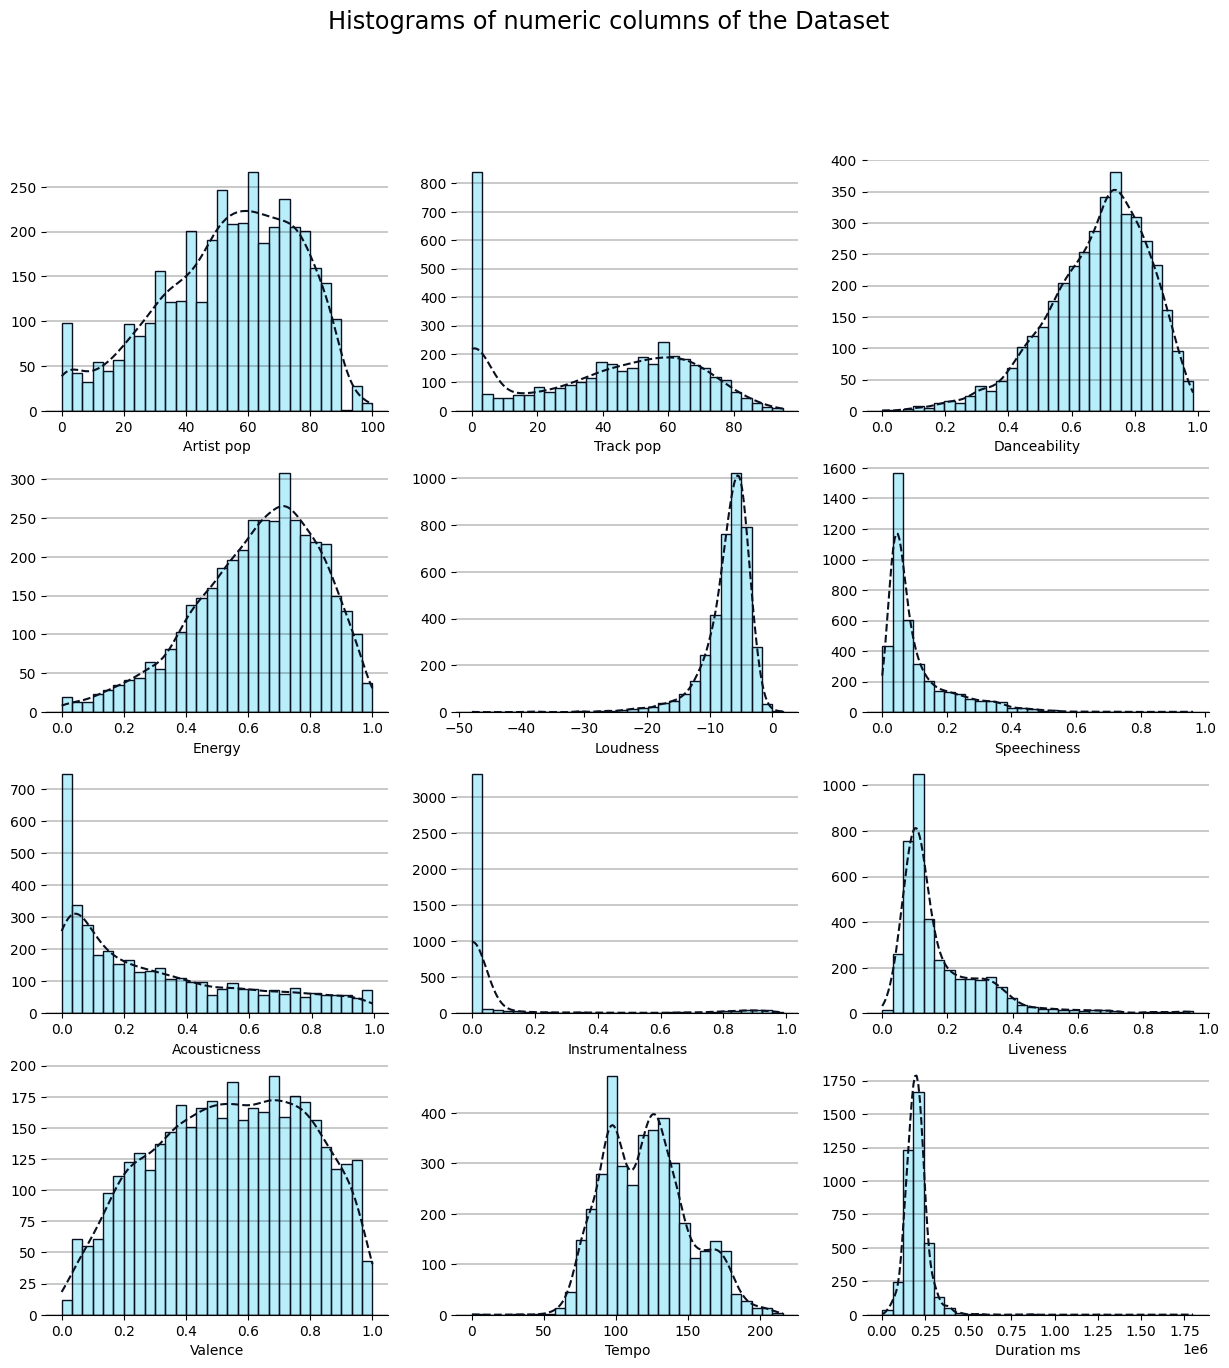

In [5]:
# distribution graphs for the numerical columns

cols = ['artist_pop', 'track_pop', 'danceability', 'energy', 
        'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
        'liveness', 'valence', 'tempo', 'duration_ms']

fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for i, col in enumerate(cols):
    
    row_index = i // 3
    col_index = i % 3
    
    hist(df, col, axs[row_index][col_index])

fig.suptitle("Histograms of numeric columns of the Dataset", fontsize="xx-large")
    
plt.show()


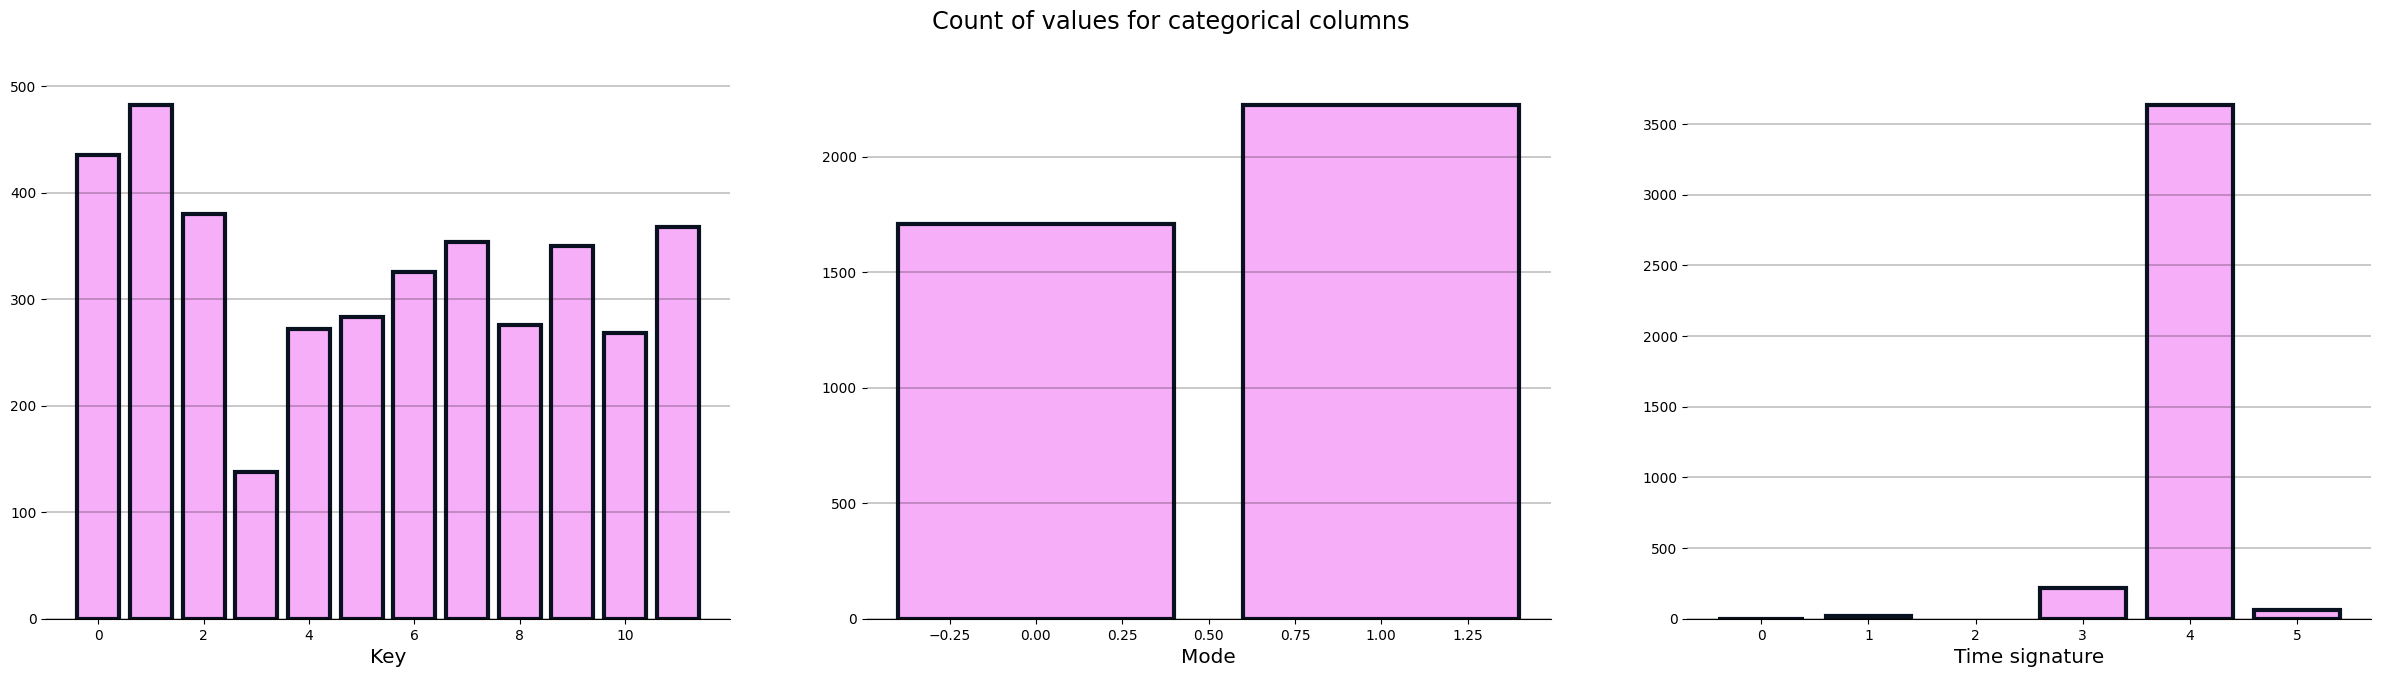

In [7]:
# distribution graphs for categorical columns

cols = ['key', 'mode', 'time_signature']

fig, ax = plt.subplots(1, 3, figsize=(30, 7))

for i, col in enumerate(cols):

    count(df, col, ax[i])
    
fig.suptitle("Count of values for categorical columns", size="xx-large")

plt.show()

We can see that for the most part, the songs from this dataset, which are all relatively popular on Tiktok (more than 100k videos) are:
- Energetic, high tempo, loud, and danceable
- Mainly music and not speech
- Under 5 minutes in length
- Recorded in a Studio (not live)
- Not entirely acoustic
- Overwhelmingly not instrumental (contain words)
- have 4/4 time signature

But are these features enough to distinguish the songs that go extremely viral from all the rest?
Of course extremely viral is subjective-for example we can use 10 million videos made as the threshold, or 1 million or 50 million.
For reference, the most popular song on tik tok has ~35 million videos.

On the new features Omer extracted from the audio:

c:\GitHub\go-viral\go-viral\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\GitHub\go-viral\go-viral\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\GitHub\go-viral\go-viral\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\GitHub\go-viral\go-viral\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

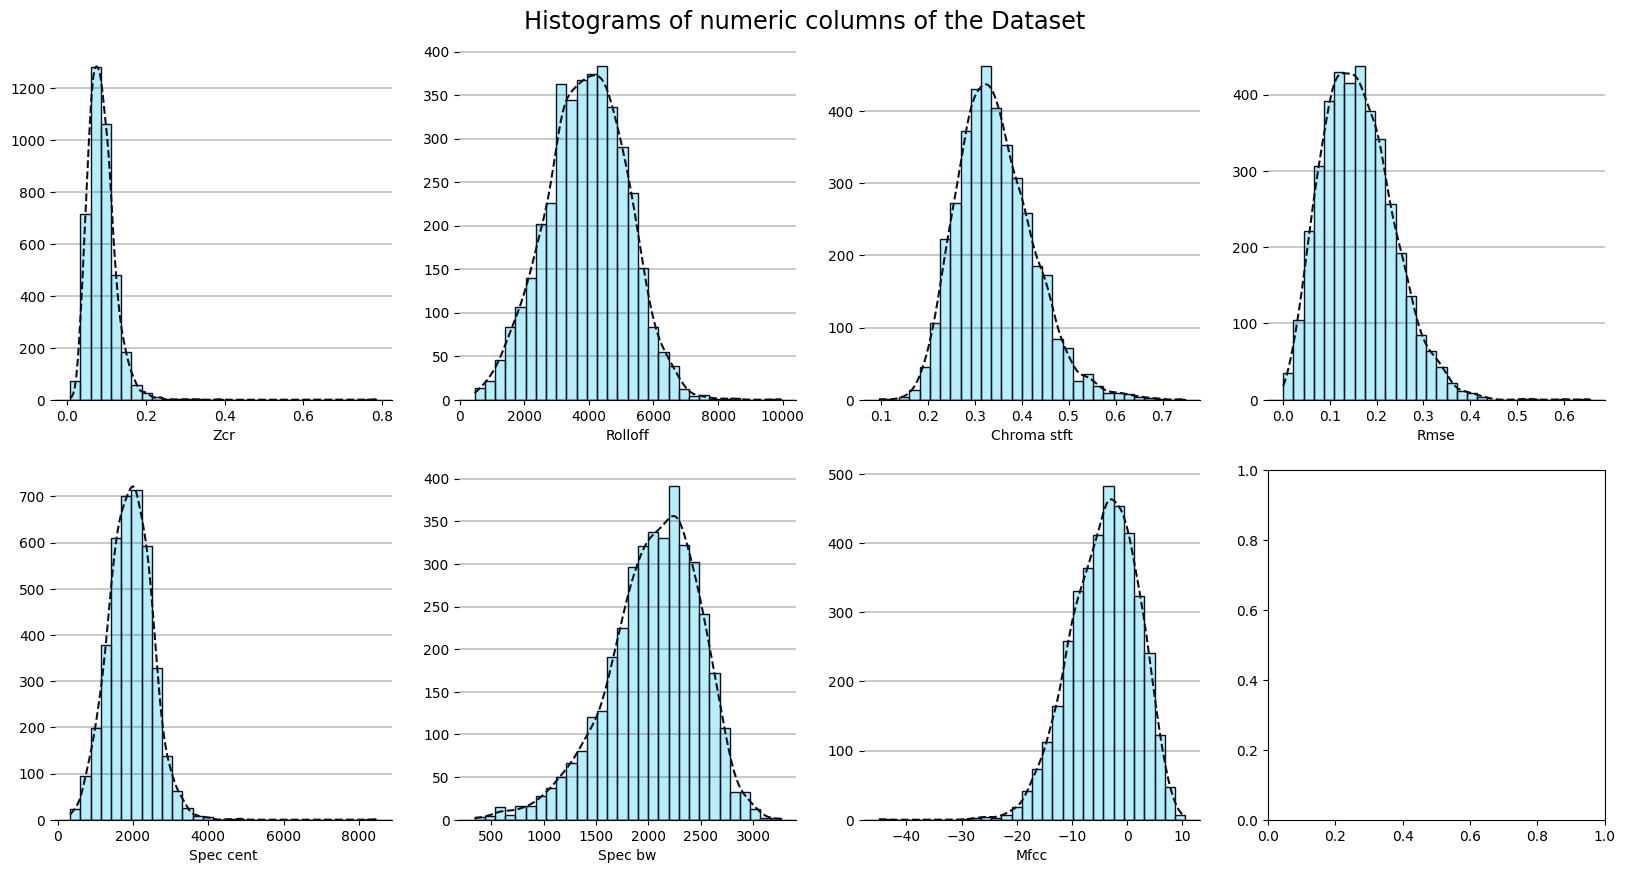

In [10]:
# distribution graphs for the numerical columns

cols = ['zcr','rolloff','chroma_stft','rmse','spec_cent','spec_bw','mfcc']

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, col in enumerate(cols):
    
    row_index = i // 4
    col_index = i % 4
    
    hist(df, col, axs[row_index][col_index])

fig.suptitle("Histograms of numeric columns of the Dataset", fontsize="xx-large", y=0.92)
    
plt.show()

## Correlation between all pairs:

We will now see the correlation between all pairs of features:

<Axes: >

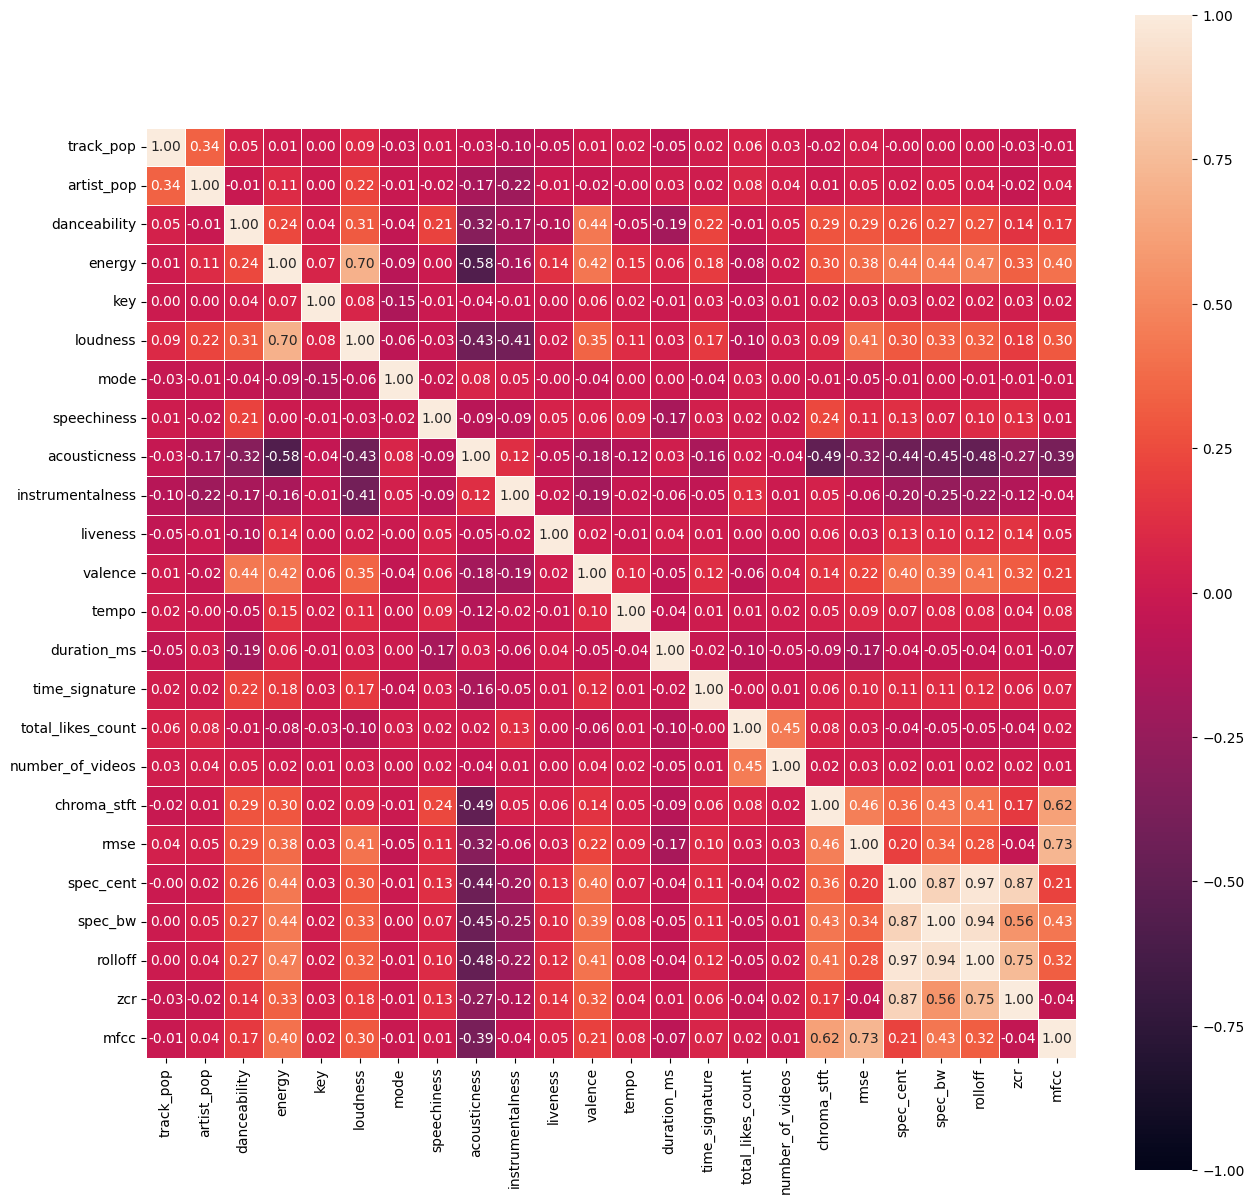

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))

corr = df.corr()
    
sns.heatmap(corr, annot=True, ax=ax, square=True, linewidth=.5, vmin=-1, vmax=1, fmt=".2f")
    

few takeovers:

* artist_pop has the highest correlation with track_pop.
* total_likes_count has the highest correlation with number_of_videos. However, if we know the total number of likes, it is easy to estimate the number of videos and vice versa, meaning they are both hard.
* length and duration_ms has the maximum correlation (make sense).
* all other pairs has very low correlation.